# Project 2- Ames Housing Data

## Table of Contents

- [Problem Statement](#Problem-Statement)
- [Functions](#Functions)
- [Data and Sources Used In This Analysis](#Sources)
- [Functions](#Necessary-Functions)


## Problem Statement

Two business partners who are expanding into real estate are looking to develop a long-term partnership with your analytics consulting firm, and you are tasked to develop a prediction model that will highlight the need for deeper analytics as they develop their strategy and enter the market. We hope to draw them into greater partnership with the firm.

The model they are looking for will ideally predict and immediately provide the price of a house at sale. For the purposes of developing the model, a standard pricing dataset will be given. the model should be able to account for a variety of factors, as it will be put into production elsewhere. 

## Background

In the U.S. housing market, predictive modeling is typically uses as a means to provide realtors an up-to-date comparison and price point for a home they are targeting in a buying/selling opportunity.

Historically, pricing and rent values of homes have primarily been based on total surface area and features, while location also plays a significant role on market values. Official home appraisals are done within the home on these values. 

For realtors and licensed professionals, a more complex form of analysis is used. Comparative Market Analysis and the Hedonic Pricing Method are often used as a means to baseline pricing in a localized area. These are more complex forms of pricing evaluation, as it takes the broader market into consideration, and uses a defined set of metrics within the real-estate industry to evaluate housing markets. Namely:

* **"Rule of Three"**- Housing data that is current (within 6 months, ideally 3) is appropriate for analysis, while anything outside of that is excluded. Pending housing opportunities that have not yet closed may be used as well.
* **Market environment and location**
* **Surface area and lot size**
* **Overall condition and misc. features** - Any and all features are potential indicators of a house's value, and feature importance may shift due to culture or geography.
* **Financing terms**

These metrics encompass most of the pricing variables that matter within traditional modeling, and will be what we look to factor in within our modeling.

## Sources
##### [Back to Table of Contents](#Table-of-Contents)

### Publications
https://www.rocketmortgage.com/learn/comparative-market-analysis

https://www.toptal.com/finance/real-estate/real-estate-valuation

### Data Background

The Data set contains information from the Ames Assessor's office on individual residential properities sold in Ames, IA from 2006 to 2010.

### Datasets


* [`train.csv`](./datasets/test.csv): Ames Housing Data, training set we will use as a predictor;([source](https://www.kaggle.com/c/dsir-82-project-2-regression-challenge/data))

* [`test.csv`](./datasets/test.csv): testing data we will make our prediction on;([source](https://www.kaggle.com/c/dsir-82-project-2-regression-challenge/data))




<H3><center>Data Dictionary</center></H3>

<H5><center>Dataset has been condensed to show most utilized features within the model, Full data dictionary is sourced below:</center></H5>

Original Source Data - ([source](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt))



|Feature|Type|Dataset|Description|
|---|---|---|---|
|**Id**|*int*|`train.csv`, `test.csv`|City code| 
|**lot_area**|*int*|`train.csv`, `test.csv`|Code by school| 
|**overall_qual**|*string*|`train.csv`, `test.csv`|High school locations in California| 
|**1st_flr_sf**|*string*|`train.csv`, `test.csv`|The district where the school is located|
|**2nd_flr_sf**|*string*|`train.csv`, `test.csv`|The city where the school is located| 
|**gr_liv_area**|*integer*|`train.csv`, `test.csv`|Total number of students enrolled in the 12th grade at the location|
|**garage_area**|*integer*|`train.csv`, `test.csv`|The number of students in that school who took the test| 
|**garage_cars**|*integer*|`train.csv`, `test.csv`|Average ACT reading score|
|**year_built**|*integer*|`train.csv`, `test.csv`|Average ACT English score| 
|**year_remod/add**|*integer*|`train.csv`, `test.csv`|Average ACT Math score|
|**full_bath**|*integer*|`train.csv`, `test.csv`|Average ACT Science score|
|**pool_area**|*integer*|`train.csv`, `test.csv`|Average ACT Science score|
|**pool_area**|*integer*|`train.csv`, `test.csv`|Average ACT Science score|
|**avg_composite_scr**|*integer*|`train.csv`, `test.csv`|Average ACT Composite Score|

<H3><center>Engineered Features</center></H3>

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**location_score**|*int*|`train.csv`, `test.csv`|City code| 
|**lot_area**|*int*|`train.csv`, `test.csv`|Code by school| 
|**overall_qual**|*string*|`train.csv`, `test.csv`|High school locations in California| 
|**1st_flr_sf**|*string*|`train.csv`, `test.csv`|The district where the school is located|



## Imports

In [1769]:
#Import Needed Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Lasso, RidgeCV

%matplotlib inline

## Functions

In [1770]:
def null_check(df):
    '''This function runs preliminary analysis 
    on the features and missing values of the dataset'''
    print(df.isnull().sum())
    print(df.dtypes)
    return df.describe()

In [1771]:
def drop(df, c_name):
    '''This function drops a specific column from the dataset'''
    df.drop(columns = c_name, inplace=True)
    return df

In [1772]:
def title_fix(df):
    '''This function lowers case on headings and replaces 
    whitespace with _ so that running commands is more manageable'''
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(" ", '_')
    return 'complete'
    

In [1773]:
def fill_na(df):
    '''This function fill's nan variables given a dataframe, 
    but is specifically for operations on columns'''
    mean = df.mean()
    df = df.fillna(mean)
    return 'complete'

In [1774]:
def fill_na_cat(df, string):
    '''This function fill's nan variables given a dataframe, 
    and is specifically for operations on categorical values'''
    df = df.fillna(string)
    return 'complete'

In [1775]:
def imputation(column):
    '''This function takes a numerical column and fills na values in that column with the 
    mean of the column and returns a null count before and after to show the change'''
    print(f'initial missing: {column.isnull().sum()}')
    a = column.mean()
    result = column.fillna(a)
    return result

## Data Cleaning

In [1776]:
#Read in csv data, SalePrice is target Y
ames_train = pd.read_csv('datasets/train.csv')
ames_test = pd.read_csv('datasets/test.csv')

ames_train.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [1777]:
#See dtype and null count of columns
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

The above info function shows that we have several columns that are < 100 null rows (garage_area), as well as several that are more than 70% null (fence, alley). We are going to impute the mean for the former, and check the kaggle external data dictionary to determine whether columns can be salvaged. (https://www.kaggle.com/c/dsir-82-project-2-regression-challenge/data)

Below is an indicator of this:

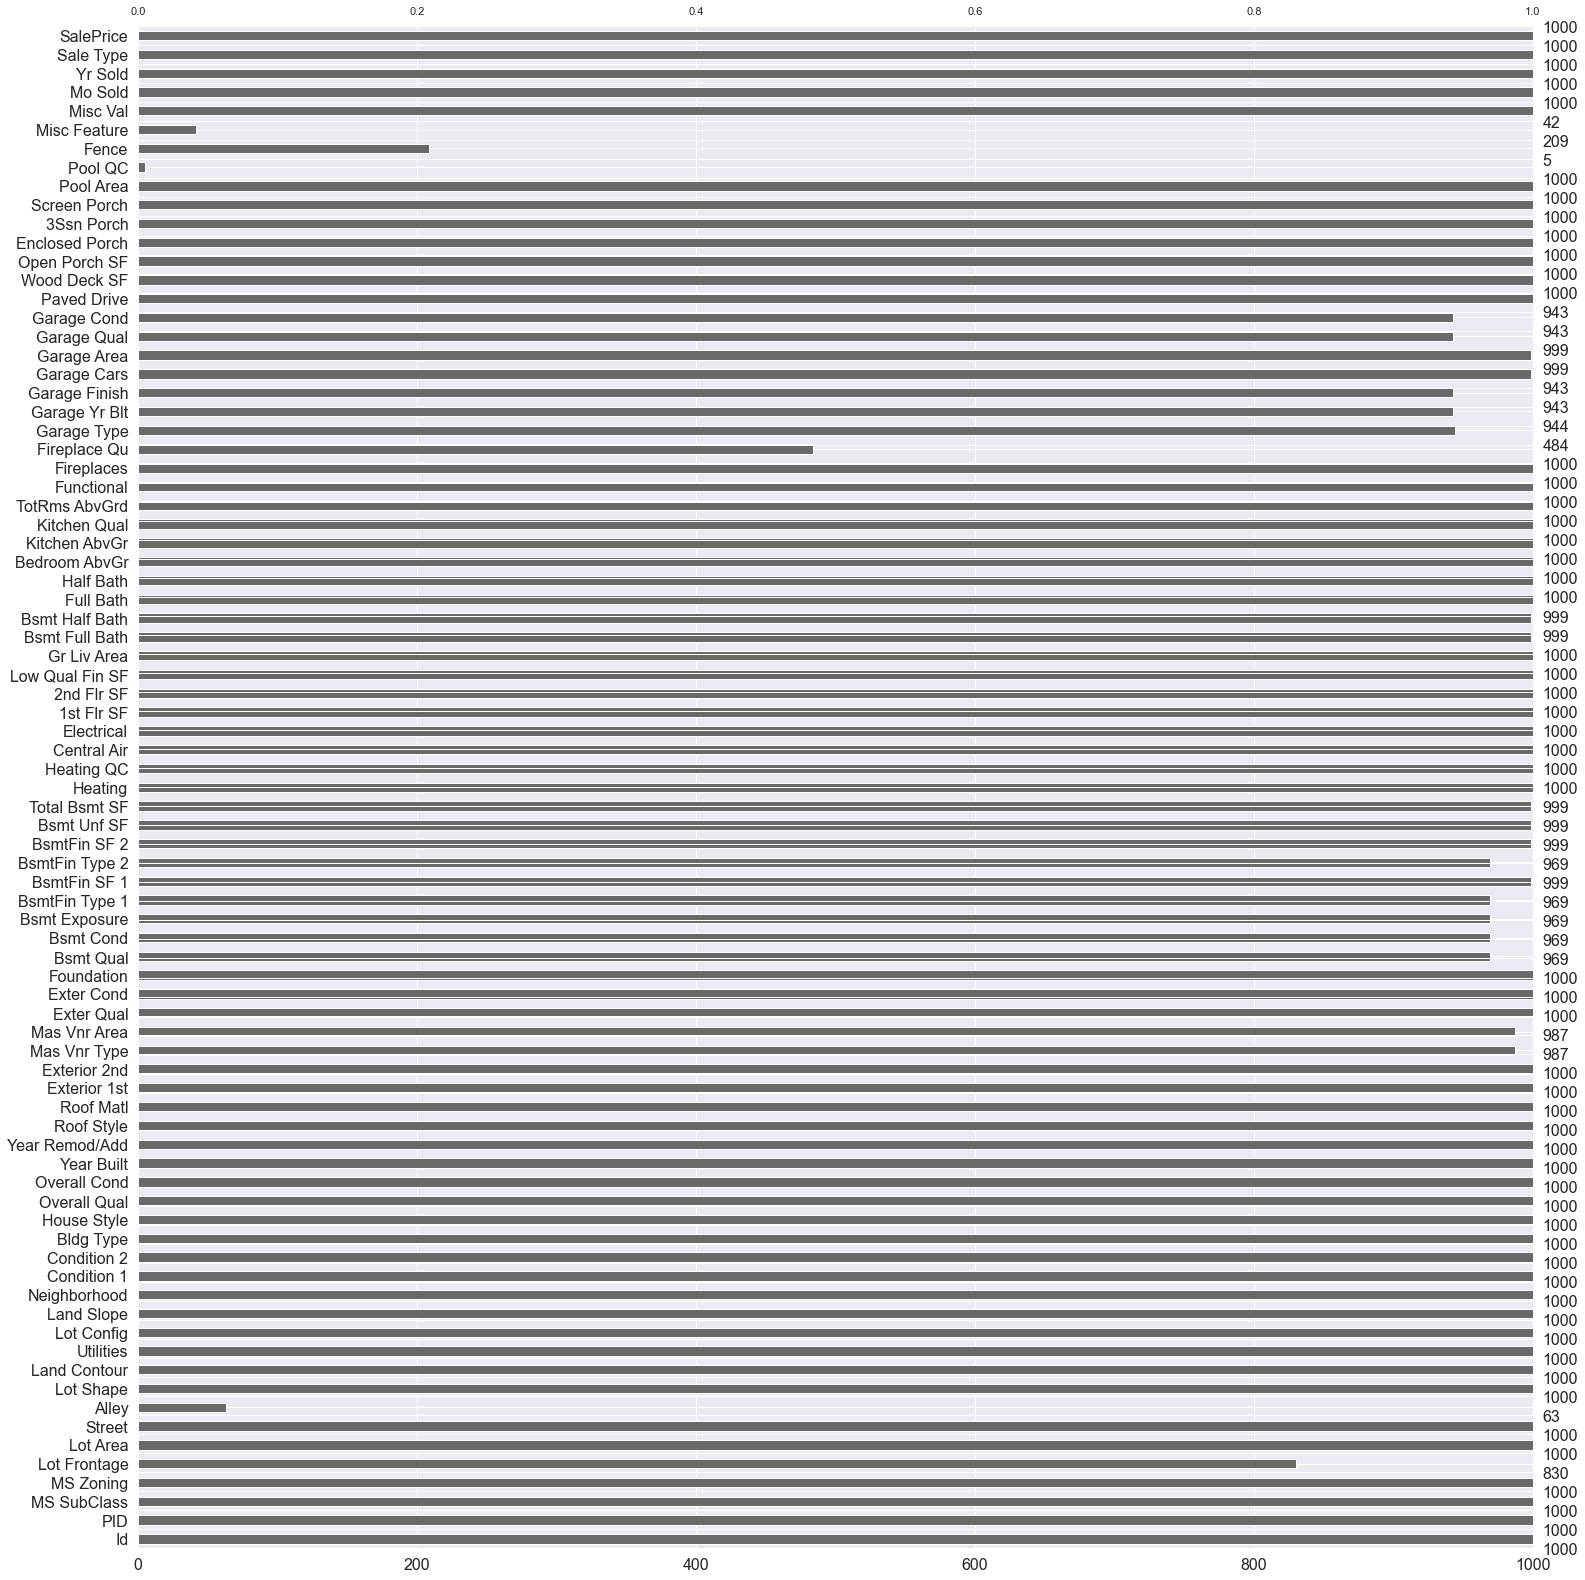

In [1778]:
#Check for nulls
msno.bar(ames_train.sample(1000));

In [1779]:
#Make heading titles lower_case, remove white space
title_fix(ames_train)
title_fix(ames_test)

'complete'

In [1780]:
#Show value counts
print(ames_train['fence'].value_counts())
ames_train['pool_qc'].value_counts()
ames_train['neighborhood'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64


NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

Value_counts indicate that some columns have significant null values. As well, there is roughly 30 neighborhoods that we are evaluating. This may be difficult to evaluate any pricing by.

### Imputation

It looks like the columns can be salvaged, as they are categorical in nature and the nan values are actually categorical indicators that the house does not have that particular feature. 

In [1781]:
def imputation(column):
    '''This function takes a numerical column and fills na values in that column with the 
    mean of the column and returns a null count before and after to show the change'''
    print(f'initial missing: {column.isnull().sum()}')
    a = column.mean()
    result = column.fillna(a)
    return result

In [1]:
#Imput values onto null values
ames_train.loc[ames_train['total_bsmt_sf'].isnull(),'total_bsmt_sf'] = ames_train['1st_flr_sf']
ames_test.loc[ames_test['total_bsmt_sf'].isnull(),'total_bsmt_sf'] = ames_test['1st_flr_sf']
ames_train['garage_area']= imputation(ames_train['garage_area'])
ames_test['garage_area'] = imputation(ames_test['garage_area'])
ames_train['garage_cars'] = imputation(ames_train['garage_cars'])
ames_test['garage_cars'] = imputation(ames_test['garage_cars'])

NameError: name 'ames_train' is not defined

Above, we imputed values to replace NAN values. Alongside our use of the mean of the data, we utilized an approach to give total basement surface area a similar area to the 1st floor. This won't affect the model in any great way as there were <10 rows affected by the imputation

In [1783]:
ames_train['total_bsmt_sf'].isnull().sum()

0

In [1785]:
#Fill na on numerical values
ames_test['fence'] = ames_test['fence'].fillna('None')
ames_train['fence'] = ames_train['fence'].fillna('None')
ames_test['misc_feature'] = ames_test['misc_feature'].fillna('None')
ames_train['misc_feature'] = ames_train['misc_feature'].fillna('None')
ames_test['fireplace_qu'] = ames_test['fireplace_qu'].fillna('None')
ames_train['fireplace_qu'] = ames_train['fireplace_qu'].fillna('None')

In [2]:
ames_train['total_bsmt_sf'].isnull().sum()

NameError: name 'ames_train' is not defined

In [3]:
ames_train.head(2)

NameError: name 'ames_train' is not defined

As we see central_air and a few other columns are categorical, we will change them to binary to give us a better dimension with which we can test. We will later do one-hot encoding to do the same across a larger subset of features

In [1787]:
#Binarize Values

binarize = {'Ex': 1, 'Gd': 1, 'TA':1, 'Fa': 1, 'No_basement': 0 }
binarize2 = {'Ex': 1, 'Gd': 1, 'TA':1, 'Fa': 1, 'No_basement': 0 }

ames_train['bsmt_qual'] = ames_train['bsmt_qual'].map(binarize)
ames_test['bsmt_qual'] = ames_train['bsmt_qual'].map(binarize)

In [1788]:
#Change to categorical binary variable (no, yes, to 0,1)
ames_test['central_air']= pd.Series(np.searchsorted(['No', 'Yes'], ames_test.central_air.values), ames_test.index)
ames_train['central_air']= pd.Series(np.searchsorted(['No', 'Yes'], ames_train.central_air.values), ames_train.index)

ames_train['central_air'].value_counts()

1    1910
0     141
Name: central_air, dtype: int64

### One-Hot Encode

Below we push categorical values into a binary format using one-hot-encoding, before pushing it back into our master model. What we are primarily interested in is the quality values for different features. (kitchen_qual, fireplace_qual, etc.)

In [1789]:
#Pd get dummies to one-hot encode
hot_encode_train = pd.get_dummies(ames_train)
hot_encode_test = pd.get_dummies(ames_test)

#csv to data folder so when can check to see what we want to add
hot_encode_test.to_csv('datasets/Encode.csv')

In [1790]:
#Dataframe of selected categories
hot_encode_df = hot_encode_train[['exter_qual_Ex', 'exter_cond_Ex', 
                                  'heating_qc_Ex', 'kitchen_qual_Ex', 
                                  'fireplace_qu_Ex', 
                                  'garage_cond_Ex', 'fence_None']]

hot_encode_df_test = hot_encode_test[['exter_qual_Ex', 'exter_cond_Ex', 
                                  'heating_qc_Ex', 'kitchen_qual_Ex', 
                                  'fireplace_qu_Ex', 
                                  'garage_cond_Ex', 'fence_None' ]]

In [1791]:
#Concat hot encoded variables onto original Dataframe
ames_train = pd.concat([ames_train, hot_encode_df], axis=1)
ames_test = pd.concat([ames_test, hot_encode_df_test], axis=1)

In [1792]:
ames_test.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,mo_sold,yr_sold,sale_type,exter_qual_Ex,exter_cond_Ex,heating_qc_Ex,kitchen_qual_Ex,fireplace_qu_Ex,garage_cond_Ex,fence_None
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,4,2006,WD,0,0,0,0,0,0,1
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,8,2006,WD,0,0,0,0,0,0,1


In [1793]:
#Change titles for columns to match Kaggle competition requirements
ames_train = ames_train.rename(columns={'saleprice': 'SalePrice', 'id': 'Id'})
ames_test = ames_test.rename(columns={'id': 'Id'})


### Creating Null Prediction

The below data will be our null prediction. This is a baseline prediction that centers on the mean of the 'SalePrice' series.

In [1794]:
#Find mean
ames_train.head()

,Id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,yr_sold,sale_type,SalePrice,exter_qual_Ex,exter_cond_Ex,heating_qc_Ex,kitchen_qual_Ex,fireplace_qu_Ex,garage_cond_Ex,fence_None
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,2010,WD,130500,0,0,1,0,0,0,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,2009,WD,220000,0,0,1,0,0,0,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,2010,WD,109000,0,0,0,0,0,0,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,2010,WD,174000,0,0,0,0,0,0,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,2010,WD,138500,0,0,0,0,0,0,1


In [1795]:
pred_array=np.full_like(ames_test['Id'], ames_train['SalePrice'].mean(), dtype=float)

Our baseline prediction will center on the mean of 'SalePrice' values and use those as the null hypothesis and starting benchmark for the dataset to be tested against.

In [1851]:
#Create dataframe out of 'ID' and 'SalePrice' values
df = pd.DataFrame(pred_array, columns=['SalePrice'], index = ames_test['Id'])

In [1852]:
df

,SalePrice
Id,
2658,181469.701609
2718,181469.701609
2414,181469.701609
1989,181469.701609
625,181469.701609
...,...
1662,181469.701609
1234,181469.701609
1373,181469.701609


In [1797]:
#Push to csv
df.to_csv('datasets/null_pred.csv')

## EDA on datasets

(array([ 42., 525., 818., 350., 168.,  79.,  40.,  16.,   6.,   7.]),
 array([ 12789. ,  72675.8, 132562.6, 192449.4, 252336.2, 312223. ,
        372109.8, 431996.6, 491883.4, 551770.2, 611657. ]),
 <BarContainer object of 10 artists>)

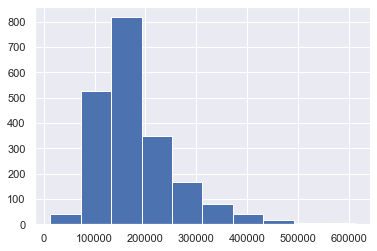

In [1798]:
plt.hist(ames_train['SalePrice'])

The skew of the distribution may present a challenge in actually evaluating 'SalePrice'. We take the log to see if the model skew can be reduced.

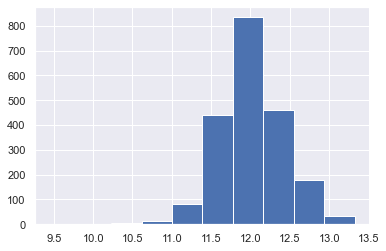

In [1799]:
np.log(ames_train['SalePrice']).hist();

This shows a normal distribution, and will be the distribution we use for our second/third models to determine the scale of improvement on the first.

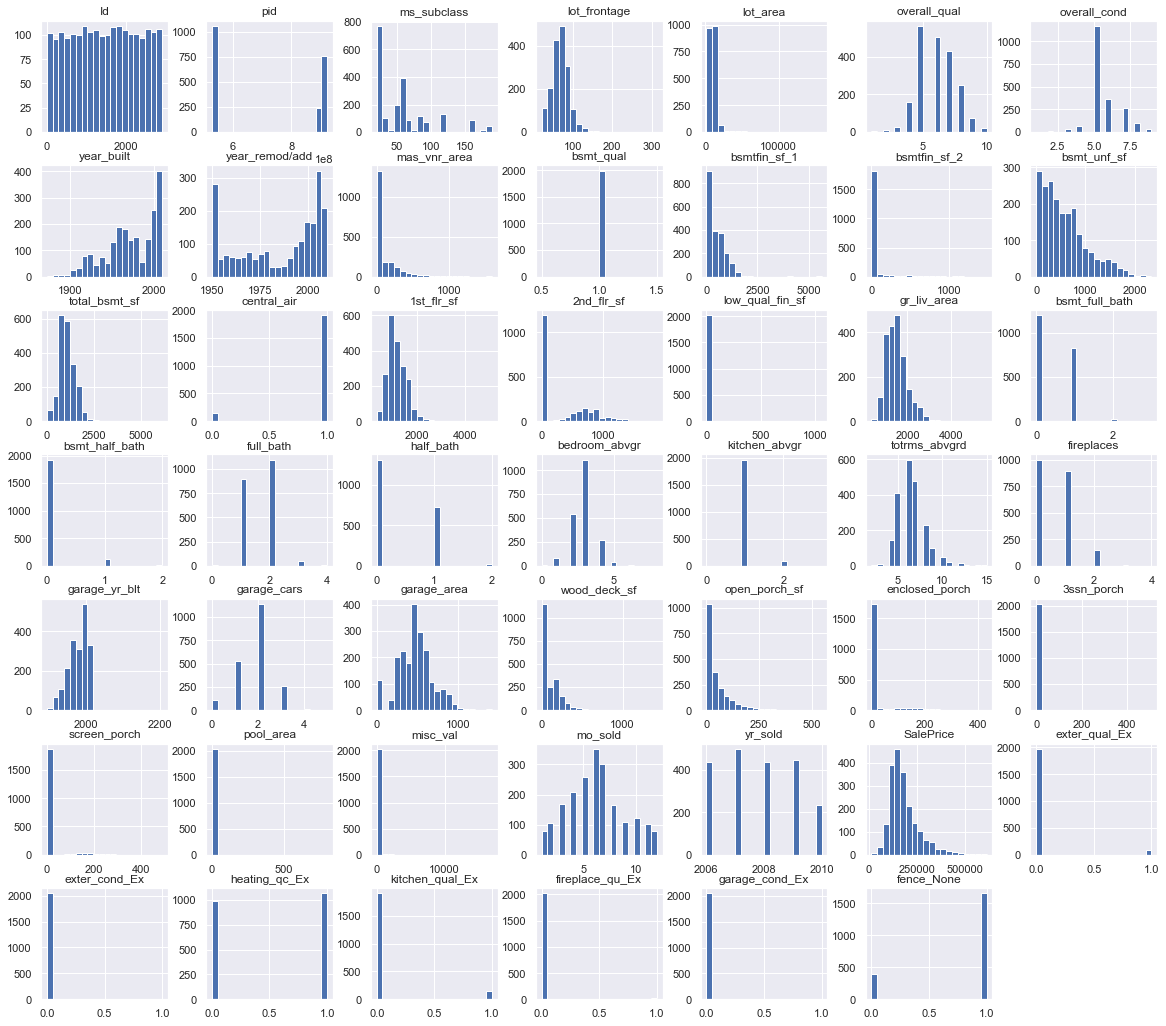

In [1800]:
ames_train.hist(bins=20, figsize=(20, 18));

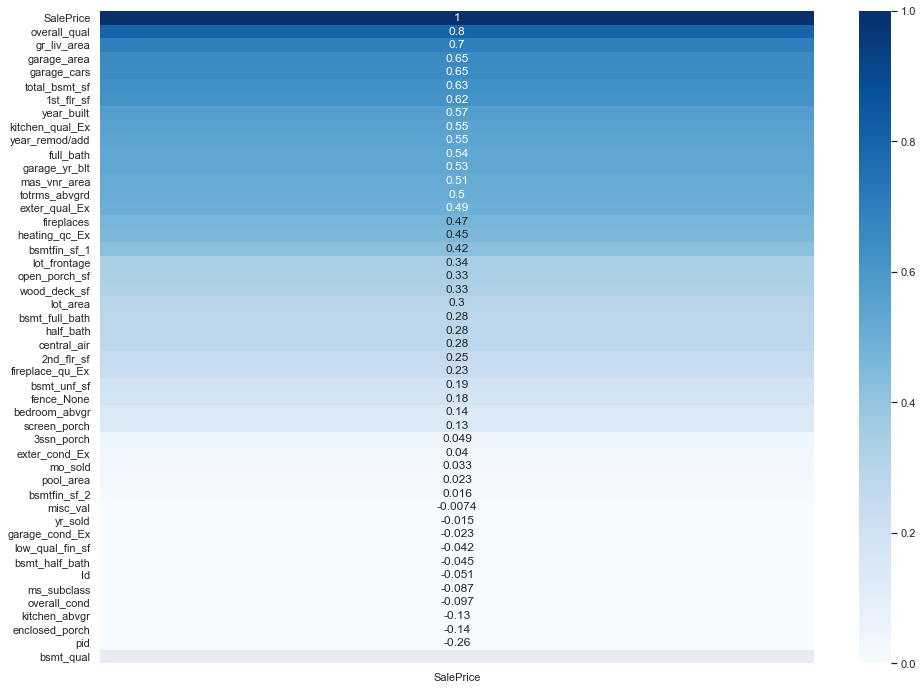

In [1801]:
#Run filtered heatmap to show correlation
heatmap = ames_train.corr()

sns.set(rc={'figure.figsize':(16,12)})

sns.heatmap(heatmap[['SalePrice']].sort_values(by = 'SalePrice',ascending = False),
            annot = True,
            vmin = 0,
            vmax = 1,
            cmap = 'Blues');

The heatmap shows high correlations for overall quality, living area, garage_area,surface area, and the year it was built (among others), so we will further evaluate these items. Later, we will model in any features with a correlation above .4.

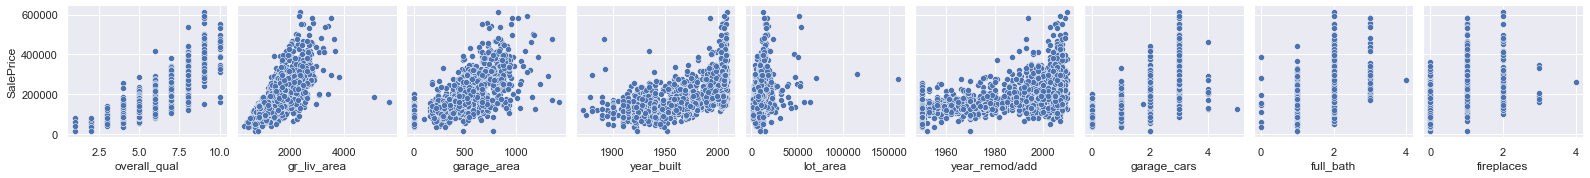

In [1802]:
sns.pairplot(data = ames_train,
            y_vars = ['SalePrice'],
            x_vars = ['overall_qual', 'gr_liv_area', 'garage_area', 
                      'year_built', 'lot_area', 'year_remod/add','garage_cars', 'full_bath', 'fireplaces'],
            diag_kind = None);

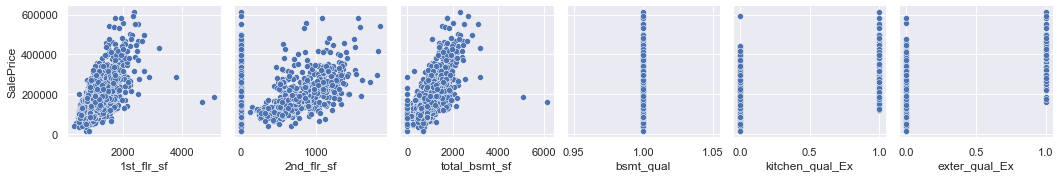

In [1803]:
sns.pairplot(data = ames_train,
            y_vars = ['SalePrice'],
            x_vars = ['1st_flr_sf', '2nd_flr_sf', 'total_bsmt_sf', 
                      'bsmt_qual','kitchen_qual_Ex', 'exter_qual_Ex'],
            diag_kind = None);

Within our data, overall_qual is the best linear metric, while 1st_flr_sf, gr_liv_area, total_bsmt_sf, and 2nd_flr_sf seem to be the good options, although a few outliers in the data (specifically 2nd_flr_sf) may present issues in the model generalizing data. We will remove several of these outliers below, as that will draw greater fit to the model without compromising the data.

## Feature Engineering

In [1804]:
#Remove Outliers
ames_train = ames_train.loc[ames_train['1st_flr_sf'] < 4000]
ames_train = ames_train.loc[ames_train['gr_liv_area'] < 4200]
ames_train = ames_train.loc[ames_train['total_bsmt_sf'] < 4200]
ames_train = ames_train.loc[ames_train['lot_area'] < 100000]
ames_train = ames_train.loc[ames_train['full_bath'] < 4]
ames_train = ames_train.loc[ames_train['fireplaces'] < 4]

## First Regression Model and Validation

Our first model is targeting the SalePrice as is, meaning we aren't running the log transformation on the data quite yet, which means the distribution will still be slightly skewed.

To start, we will remove the outliers from the 2nd_flr and bsmt categories to draw a greater fit, primarily removing rows with 0 in that column. This may not be the best move for overall prediction of houses without basements or 2nd floors.

Below are the features we want to predict on. We selected similar test data features to remain consistent.

In [1805]:
#Create Features

features = pd.DataFrame(ames_train, columns= ['Id','overall_qual', '1st_flr_sf',
                                              '2nd_flr_sf','total_bsmt_sf', 
                                              'gr_liv_area', 'garage_area', 'garage_cars', 
                                              'year_built', 'year_remod/add', 
                                              'full_bath', 'lot_area', 'kitchen_qual_Ex', 
                                              'exter_qual_Ex', 'heating_qc_Ex', 'fireplaces'])

ames_test = pd.DataFrame(ames_test, columns= ['Id', 'overall_qual', '1st_flr_sf',
                                              '2nd_flr_sf','total_bsmt_sf', 
                                              'gr_liv_area', 'garage_area', 'garage_cars', 
                                              'year_built', 'year_remod/add', 'full_bath', 
                                              'lot_area', 'kitchen_qual_Ex', 'exter_qual_Ex','heating_qc_Ex', 'fireplaces'
                                               ])


In [1806]:
#Check to make sure there are no null values
features.isnull().sum()

Id                 0
overall_qual       0
1st_flr_sf         0
2nd_flr_sf         0
total_bsmt_sf      0
gr_liv_area        0
garage_area        0
garage_cars        0
year_built         0
year_remod/add     0
full_bath          0
lot_area           0
kitchen_qual_Ex    0
exter_qual_Ex      0
heating_qc_Ex      0
fireplaces         0
dtype: int64

Below are the features we want to predict on. The correlation of each feature to SalePrice at least .40

In [1807]:
#Identify our prediction and features
X = features
y = ames_train['SalePrice']

SalePrice will be our prediction variable, and now we will begin our validation by dividing our data into training and test sets. Our test size will be .30

In [1808]:
#Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=32)


In [1809]:
#check after creating the split to make sure our shape matches; it does
assert (X_train.shape[0] == y_train.shape[0])
assert (X_test.shape[0] == y_test.shape[0])
assert (X_train.shape[0] + X_test.shape[0]) == (y_train.shape[0] + y_test.shape[0])

Here we add in our Scaler to ensure that any significant variance in scale between features (surface area vs. number of bathrooms, etc.) is nullified and does not affect the model or the eventual test data we predict on.

In [1810]:
#Import a scaler on the training data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)
ames_test1 = ss.transform(ames_test)

SalePrice will be our prediction variable, and now we will begin our validation by dividing our data into training and test sets. Our test size will be .30, as going higher may introduce lower variance and push the model into an underfit situation.

In [1811]:
#Instantiate Linear Regression
linreg = LinearRegression()

### Cross Validation

We run a cross validation on the regression to get our r-squared, which is the amount of variation that is explained by our inputs (features).

In [1812]:
# This gives us 5 cross validated testing scores (R-squared)
lr_scores = cross_val_score(linreg, X_train_sc, y_train, cv = 5)

lr_scores.mean()

0.8782802591147816

#### **Finding #1 : Our R-squared, while not excellent, shows that we have a good degree of variance that is explained by our model's current mix of features.**

### Fit Model

In [1813]:
# Fit the model on training data
linreg.fit(X_train_sc, y_train)

LinearRegression()

In [1814]:
# Training score
print(linreg.score(X_train_sc, y_train))

# Testing score
print(linreg.score(X_test_sc, y_test))

0.8831377610989856
0.8698777489262026


The r-squared scores indicate our model is performing fairly close with the training set in terms of fit, indicating that it does relatively well on unseen data. There is room for improvement on the score of the model to better predict sale prices of home given features, as well as develop a closer fit. At present the model is slightly overfit, as the training score is marginally higher than the testing score.

In [1815]:
#test MSE

y_pred = linreg.predict(X_train_sc)

print("MSE is ")
print(mean_squared_error(y_train, y_pred))
print("RMSE is ")
print(mean_squared_error(y_train, y_pred, squared = False))

MSE is 
751519275.321454
RMSE is 
27413.85188771279


In [1816]:
# test MSE

y_pred = linreg.predict(X_test_sc)
print("MSE is ")
print(mean_squared_error(y_test, y_pred))
print("RMSE is ")
print(mean_squared_error(y_test, y_pred, squared = False))

MSE is 
770209030.8951126
RMSE is 
27752.640070723228


In [1817]:
x = list(zip(X, linreg.coef_))

df = pd.DataFrame(x, columns = ['feature', 'coef'])

df.sort_values('coef', axis = 0, ascending = False)

,feature,coef
1,overall_qual,19533.172969
2,1st_flr_sf,16659.925889
3,2nd_flr_sf,16402.277442
4,total_bsmt_sf,11664.738476
12,kitchen_qual_Ex,10550.405486
13,exter_qual_Ex,9559.311776
8,year_built,9031.771367
6,garage_area,8682.975372
11,lot_area,7457.403142
9,year_remod/add,6484.329868


In [1818]:
print(linreg.intercept_)

180654.8909090909


#### **Finding #2 : Our RMSE shows that for any prediction, we are at most $28,500 away from the actual sales price.**

#### **Finding #3 : Our intercept shows that the baseline house, all else being 0, would price at $180,000**

#### **Finding #4 : Our Coefficients shows that for the baseline house, all else being constant, surface area is a significant determinant of price, as expected, while quality ratings were significant indicators of price within this dataset. In terms of quality, the Kitchen and Exterior (siding, roofing, etc.) quality were the highest indicators of price.**

### Push to Kaggle Competition

In [1819]:
y_pred = linreg.predict(ames_test1)



In [1820]:
df = pd.DataFrame(y_pred, columns=['SalePrice'], index = ames_test['Id'])

In [1821]:
df.to_csv('datasets/submission.csv')

### K-Folds Cross Validation

In [1822]:
# Instantiate model
linreg= LinearRegression()

Perform cross_val_score function with 5 folds

In [1823]:
#Use the model for a cross_val_score
cross_val_score(estimator=linreg, X=X, y=y)

array([0.86983389, 0.88860249, 0.88715787, 0.87382085, 0.86735039])

In [1824]:
#Find R^2
cross_val_score(estimator=linreg, X=X, y=y).mean()

0.877353098795567

In [1825]:
cross_val_score(estimator=linreg, X=X, y=y).std()

0.008851575629842226

In [1826]:
#Run the cross validation on our training subset

In [1827]:
linreg = LinearRegression()
cross_val_score(estimator=linreg, X=X_train, y=y_train, cv=5)

array([0.8719786 , 0.87503155, 0.89901762, 0.87385081, 0.87152271])

In [1828]:
#Make predictions
y_pred[0:5]

array([158718.98428803, 210613.15869688, 205471.43733603, 118726.17439869,
       181520.60998016])

In [1829]:
linreg = LinearRegression()
cross_val_predict(estimator=linreg, X=X, y=y)[0:5]


array([169891.37390106, 236288.54650339, 125394.61195242, 142211.36784786,
       134091.15112435])

## Creating Second Regression (Lasso) using Log

We will be adding another regression, the Lasso regression below, which runs an algorithm that will normalize data by penalizing high coefficients, hopefully reducing the amount of overfit in our previous linear model. Additionaly, we will incorporate the log transformation that allows for our predictive variable (SalePrice) to be evaluated as a normally distributed variable, as opposed to a skewed distribution which will throw our prediction off.

In [1830]:
#Choose features and prediction variable
X2 = features
y2 = ames_train['SalePrice']

#Train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, 
                                                    y2, 
                                                    test_size=0.30, 
                                                    random_state=32)

In [1831]:
ss = StandardScaler()
ss.fit(X_train2)

X_train_sc2 = ss.transform(X_train2)
X_test_sc2 = ss.transform(X_test2)

**Transformed Target Regressor**- We used this function to transform the y predictor into a log, before instantiating a regression. The inverse function reverses the log transformation we did without reverting our new results, allowing us to get a normalized MSE we can interpret. We set the alpha to .1, which tightens up our coefficiencts from the previous model without severely reducing the amount of coefficients (if our alpha was higher, like .5) the model is using.



In [1832]:
#Instantiate model
TTR = TransformedTargetRegressor(regressor=Lasso(alpha=0.01),func=np.log,inverse_func=np.exp)

In [1833]:
# Fit the model on training data
linreg2 = TTR.fit(X_train_sc2, y_train2)

In [1834]:
# This gives us 5 cross validated testing scores (R-squared)
lr_scores = cross_val_score(linreg2, X_train_sc2, y_train2, cv = 5)

lr_scores.mean()

0.9051285115500978

Finding #1 

#### **Finding #1 : The Lasso linear regression we ran increased our score and r-squared values by 2 points, as 90% of the variables are able to be explained by the variance. The fit of the model is also improved as a result of the log transformation.**

In [1835]:
#train MSE

y_pred2 = linreg2.predict(X_train_sc2)
print("MSE: ")
print(mean_squared_error(y_train2, y_pred2))
print("RMSE: ")
print(np.sqrt(mean_squared_error(y_train2, y_pred2)))

MSE: 
599949544.6715984
RMSE: 
24493.867491100675


In [1836]:
# test MSE

y_pred2 = linreg2.predict(X_test_sc2)
print("MSE: ")
print(mean_squared_error(y_test2, y_pred2))
print("RMSE: ")
print(np.sqrt(mean_squared_error(y_test2, y_pred2)))

MSE: 
591183491.7768093
RMSE: 
24314.265190969876


#### **Finding #2 : Our RMSE for our Lasso regression shows that for any prediction, we are at most $25,000 away from the actual sales price.**

## Creating Third Regression (Ridge) using Log

In [1842]:
#Choose features and prediction variable
X3 = features
y3 = ames_train['SalePrice']

#Train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, 
                                                    y3, 
                                                    test_size=0.30, 
                                                    random_state=32)

ss = StandardScaler()
ss.fit(X_train3)

X_train_sc3 = ss.transform(X_train3)
X_test_sc3 = ss.transform(X_test3)


#Instantiate model
TTR2 = TransformedTargetRegressor(regressor=RidgeCV(),func=np.log,inverse_func=np.exp)

# Fit the model on training data
linreg3 = TTR2.fit(X_train_sc3, y_train3)

In [1849]:
# This gives us 5 cross validated testing scores (R-squared)
lr_scores = cross_val_score(linreg3, X_train_sc3, y_train3, cv = 5)

lr_scores.mean()

0.906874812641435

#### **Finding #1 : Our Ridge Regression r-2 sees a minimal improvement compared to the Lasso Regression**

In [1844]:
# Training score
print(linreg2.score(X_train_sc2, y_train2))

# Testing score
print(linreg2.score(X_test_sc2, y_test2))

0.9067070542029972
0.90012305275327


In [1846]:
#train MSE

y_pred3 = linreg3.predict(X_train_sc3)
print("MSE: ")
print(mean_squared_error(y_train3, y_pred3))
print("RMSE: ")
print(np.sqrt(mean_squared_error(y_train3, y_pred3)))

MSE: 
582374476.2038455
RMSE: 
24132.43618460112


In [1847]:
# test MSE

y_pred3 = linreg3.predict(X_test_sc3)
print("MSE: ")
print(mean_squared_error(y_test3, y_pred3))
print("RMSE: ")
print(np.sqrt(mean_squared_error(y_test3, y_pred3)))

MSE: 
569689469.9806958
RMSE: 
23868.16855103667


#### **Finding #2 : Our RMSE for our best performing regression shows that for any prediction, we are at most $23,900 away from the actual sales price.**

### Data Visualizations for Presentation

# Conclusions and Recommendations

To conclude our analysis 

1. Correlations for Housing Price in Ames, Iowa

Based on the data we have, the top features that determine the price 

http://jse.amstat.org/v19n3/decock/DataDocumentation.txt



Additional Considerations:

* Our model was trained on data at a space and time spanning 2006-2009. Further partnership will see us scale it into a near-term valuation format that is consistent with industry standards for CMA, analyzing sales within 3-6 months of present date.